In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "app_train.csv")
pa_pos = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_pos.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
app_train = app_train.set_index("SK_ID_CURR")
pa_pos = pa_pos.set_index("SK_ID_CURR")

In [5]:
ID_Payback = app_train[app_train["TARGET"] == 0].index.values
ID_Default = app_train[app_train["TARGET"] == 1].index.values

In [6]:
ID_Payback = np.intersect1d(ID_Payback, pa_pos.index.values)
ID_Default = np.intersect1d(ID_Default, pa_pos.index.values)

In [7]:
payback = pa_pos.loc[ID_Payback]
default = pa_pos.loc[ID_Default]

In [8]:
mets = ["PA_AMT_ANNUITY", "PA_AMT_APPLICATION", "PA_AMT_CREDIT", "PA_AMT_DOWN_PAYMENT", "PA_AMT_GOODS_PRICE", "PA_RATE_DOWN_PAYMENT"]

In [9]:
pa_pos.head()

,PA_CNT_CREDITS,PA_POS_CNT_PAYMENTS_LEFT,PA_POS_CNT_DPD,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
158271,1,0.0,0.0,6404.310,58905.000,65124.0,0.000,58905.000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
252457,1,9.0,0.0,4951.350,47056.275,52641.0,4.275,47056.275,0.000088,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
260094,9,70.0,0.0,97839.945,2023469.370,2294779.5,8765.370,2023469.370,0.312513,0.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0,3.0,0.0,4.0,0.0
176456,1,0.0,0.0,14713.605,123486.075,120307.5,12349.575,123486.075,0.101388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
256657,3,28.0,0.0,60139.575,1115806.500,1277523.0,78714.000,1115806.500,0.699443,2.0,7.0,5.0,1.0,0.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0


### PA_AMT_ANNUITY

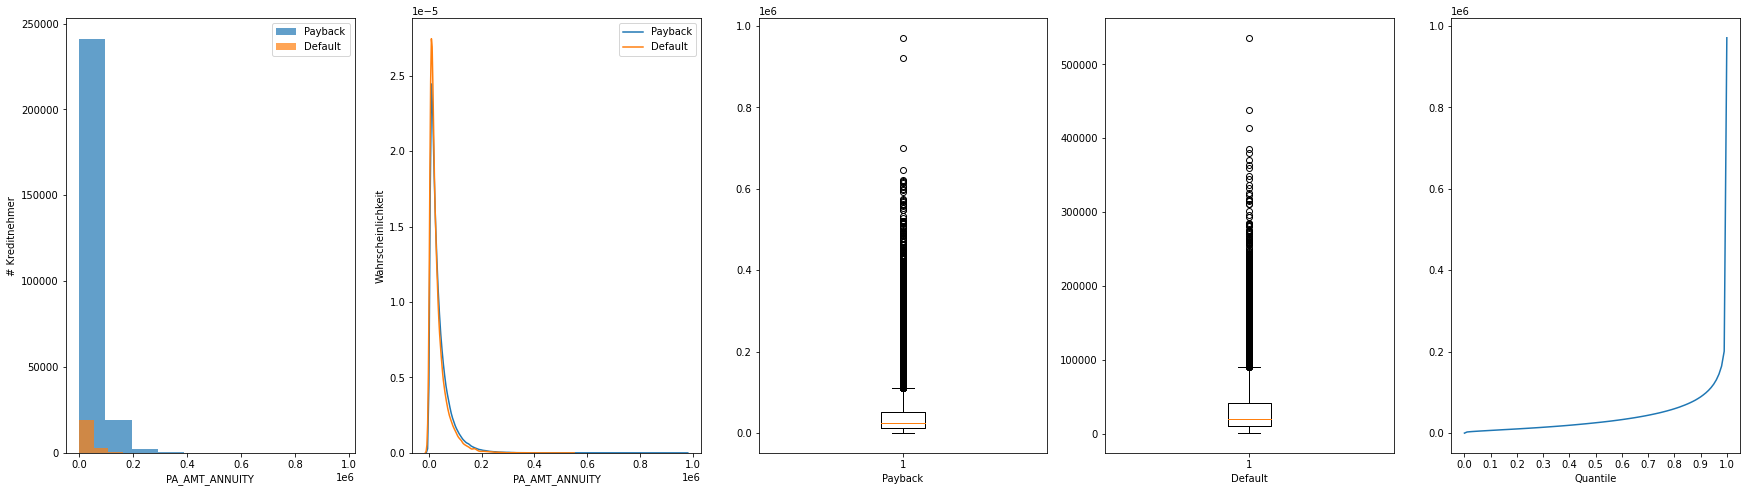

### PA_AMT_APPLICATION

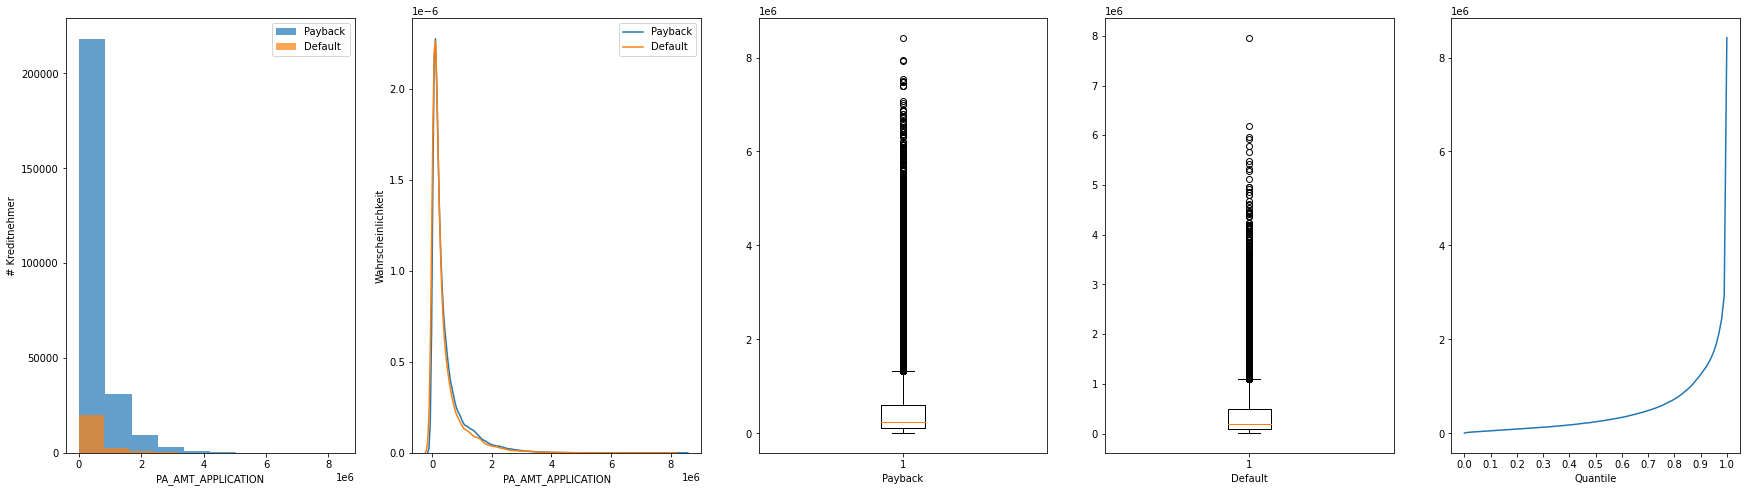

### PA_AMT_CREDIT

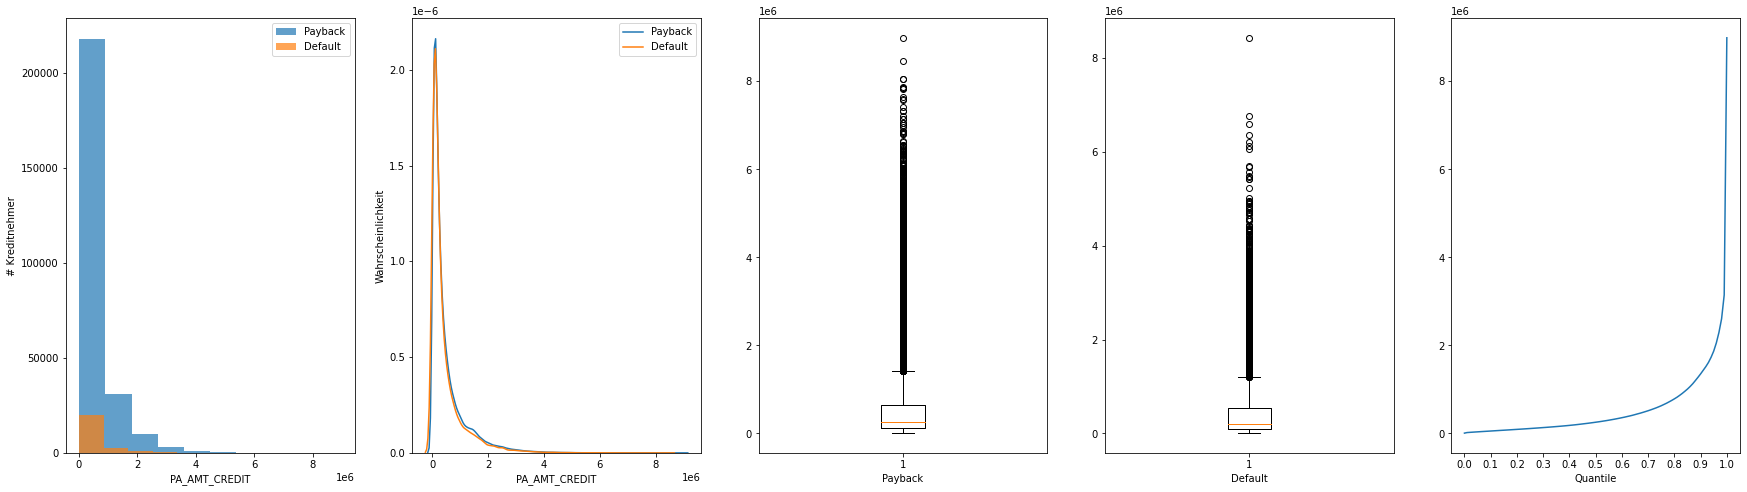

### PA_AMT_DOWN_PAYMENT

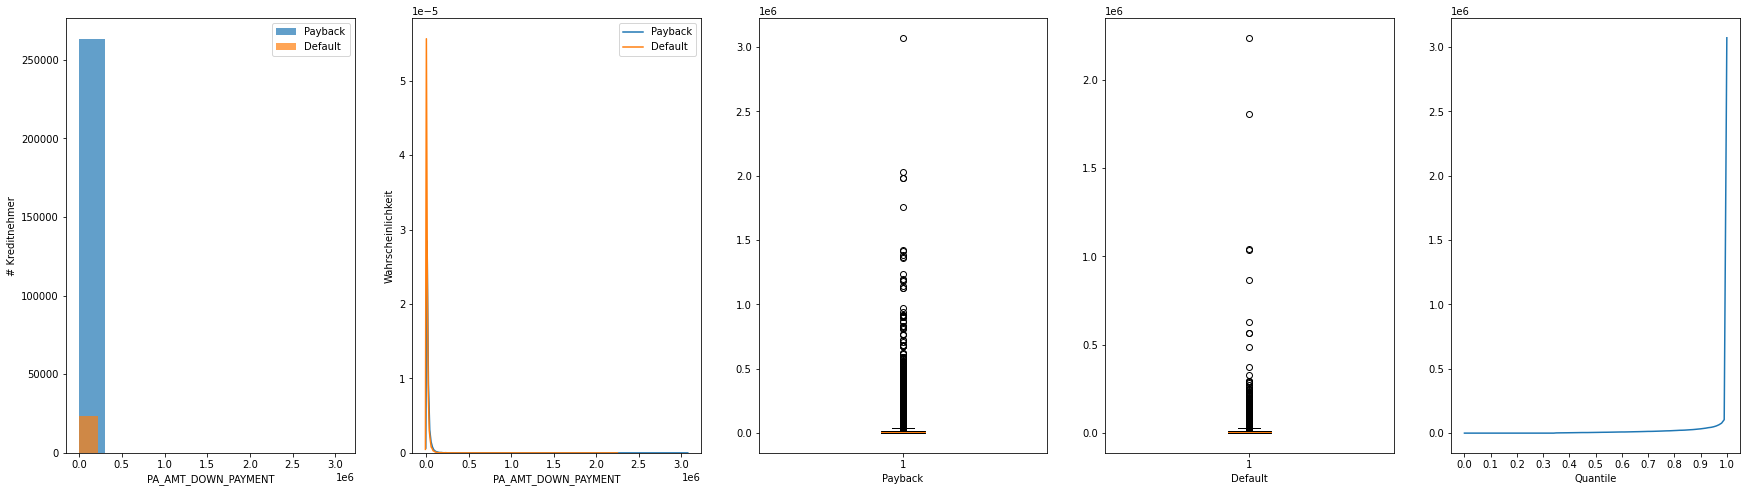

### PA_AMT_GOODS_PRICE

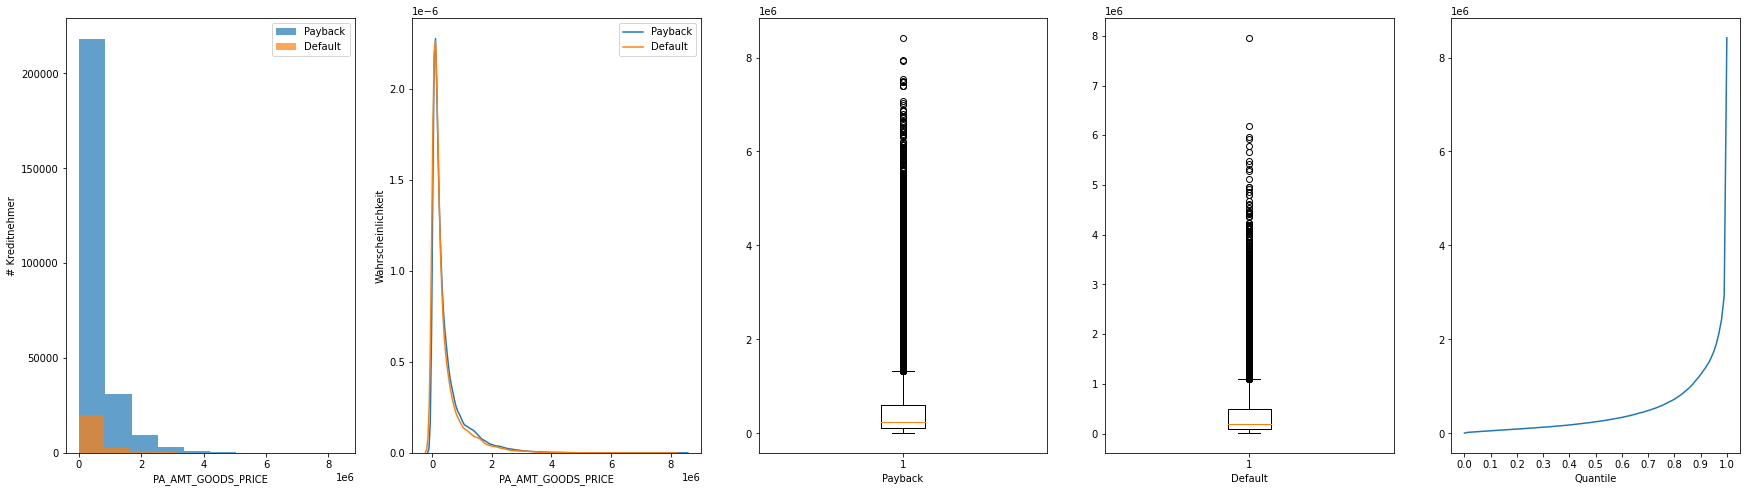

### PA_RATE_DOWN_PAYMENT

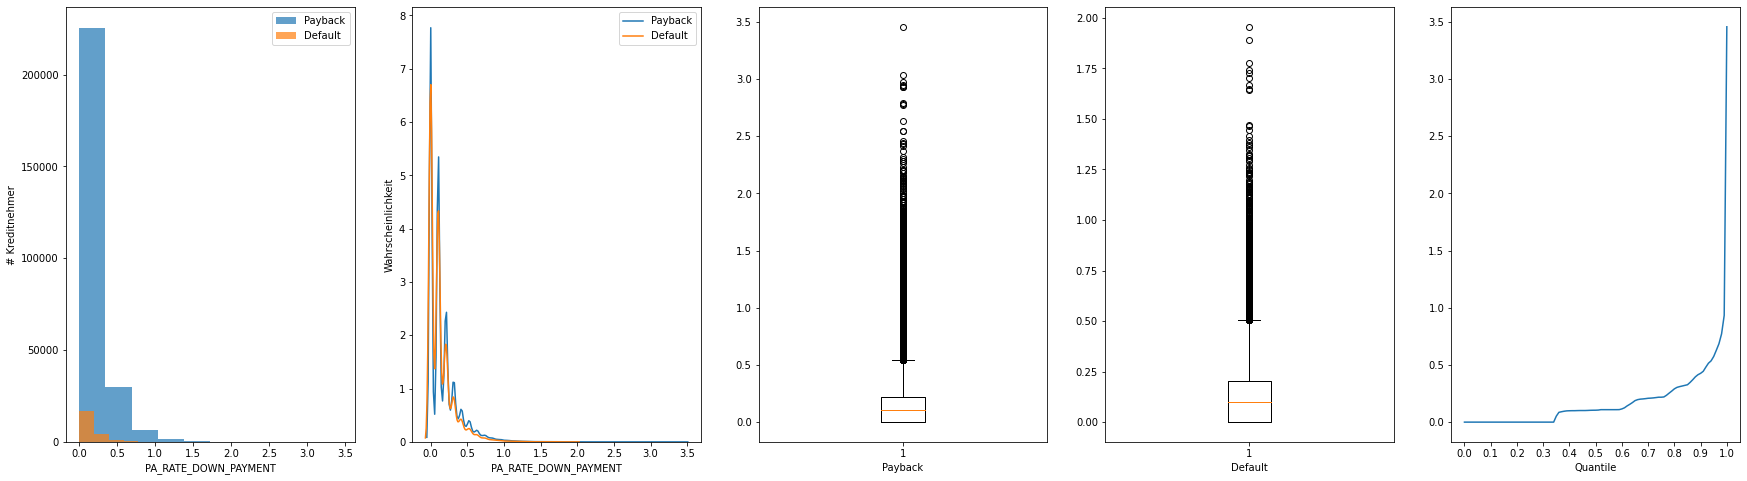

In [10]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
    fig.set_size_inches(30, 8)

    ax1.hist(pb, alpha=0.7)
    ax1.hist(df, alpha=0.7)
    ax1.legend(labels=["Payback","Default"])
    ax1.set_xlabel(head)
    ax1.set_ylabel("# Kreditnehmer")

    sns.kdeplot(pb, alpha=0.7, ax=ax2)
    sns.kdeplot(df, alpha=0.7, ax=ax2)
    ax2.legend(labels=["Payback","Default"])
    ax2.set_xlabel(head)
    ax2.set_ylabel("Wahrscheinlichkeit")

    a = payback[head].copy()
    a = a.dropna()
    ax3.boxplot(a)
    ax3.set_xlabel("Payback")
    

    b = default[head].copy()
    b = b.dropna()
    ax4.boxplot(b)
    ax4.set_xlabel("Default")

    quantiles = [pa_pos[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
    ax5.plot(np.arange(0,1 + 0.01,0.01), quantiles)
    ax5.set_xticks(np.arange(0,1 + 0.1,0.1))
    ax5.set_xlabel("Quantile")

    plt.show()

In [11]:
todo = ["PA_AMT_ANNUITY","PA_AMT_APPLICATION","PA_AMT_CREDIT","PA_AMT_DOWN_PAYMENT","PA_AMT_GOODS_PRICE","PA_RATE_DOWN_PAYMENT"]

In [12]:
pa_pos[todo].head()

,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT
SK_ID_CURR,,,,,,
158271,6404.310,58905.000,65124.0,0.000,58905.000,0.000000
252457,4951.350,47056.275,52641.0,4.275,47056.275,0.000088
260094,97839.945,2023469.370,2294779.5,8765.370,2023469.370,0.312513
176456,14713.605,123486.075,120307.5,12349.575,123486.075,0.101388
256657,60139.575,1115806.500,1277523.0,78714.000,1115806.500,0.699443


In [13]:
todo

['PA_AMT_ANNUITY',
 'PA_AMT_APPLICATION',
 'PA_AMT_CREDIT',
 'PA_AMT_DOWN_PAYMENT',
 'PA_AMT_GOODS_PRICE',
 'PA_RATE_DOWN_PAYMENT']

PA_AMT_ANNUITY

In [14]:
head = "PA_AMT_ANNUITY"

In [15]:
quantiles = [pa_pos[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.286945,0.063305,0.052394,0.044341,0.0425,0.041242,0.038265,0.037971,0.039266,0.038537,0.036473,0.037874,0.039385,0.038897,0.03724,0.036342,0.035983,0.037094,0.03817,0.039467,0.038854,0.040436,0.039249,0.039272,0.041184,0.0434,0.042091,0.042805,0.044442,0.047009,0.046738,0.04749,0.049156,0.047432,0.050178,0.049863,0.05203,0.052038,0.054871,0.057085,0.057449,0.059354,0.059541,0.062436,0.063637,0.060727,0.064962,0.067975,0.067132,0.070593,0.069009,0.06867,0.077229,0.076399,0.075413,0.080132,0.085681,0.08604,0.088625,0.089539,0.094556,0.098118,0.099837,0.104046,0.105011,0.11099,0.116183,0.116892,0.122538,0.131873,0.13413,0.140577,0.143222,0.147447,0.158028,0.171081,0.170464,0.186754,0.18648,0.205558,0.215588,0.224143,0.252269,0.253781,0.274305,0.297262,0.320508,0.344038,0.395251,0.422617,0.486281,0.53582,0.614384,0.722641,0.867554,1.091411,1.438197,2.024272,3.786498,79.271539


In [16]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [17]:
pa_pos.loc[ID_DROP, head] = np.nan

In [18]:
todo.remove(head)
todo

['PA_AMT_APPLICATION',
 'PA_AMT_CREDIT',
 'PA_AMT_DOWN_PAYMENT',
 'PA_AMT_GOODS_PRICE',
 'PA_RATE_DOWN_PAYMENT']

PA_AMT_APPLICATION

In [19]:
head = "PA_AMT_APPLICATION"

In [20]:
quantiles = [pa_pos[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.168527,0.052698,0.051595,0.04744,0.047189,0.044964,0.0476,0.040648,0.047119,0.046456,0.045082,0.042384,0.04573,0.036904,0.045378,0.045437,0.043961,0.044918,0.049191,0.028745,0.047806,0.044802,0.047626,0.047119,0.052414,0.038945,0.048491,0.050042,0.050623,0.053109,0.027277,0.053484,0.058553,0.060937,0.059044,0.050738,0.060877,0.064555,0.067094,0.059555,0.067411,0.077301,0.078262,0.076535,0.084932,0.090494,0.059902,0.075769,0.099015,0.092634,0.101619,0.101191,0.085895,0.107074,0.114541,0.112228,0.126224,0.109656,0.140533,0.108286,0.154913,0.136732,0.165566,0.164359,0.162185,0.194965,0.198008,0.126524,0.225683,0.204161,0.209877,0.227228,0.23482,0.2652,0.262497,0.314573,0.318861,0.366256,0.295352,0.377451,0.421949,0.452983,0.496148,0.563972,0.530847,0.618796,0.668913,0.86007,0.748651,0.85574,0.939105,0.938204,1.065632,1.270511,1.574871,1.995976,2.718348,3.487092,6.009457,65.202962


In [21]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [22]:
pa_pos.loc[ID_DROP, head] = np.nan

In [23]:
todo.remove(head)
todo

['PA_AMT_CREDIT',
 'PA_AMT_DOWN_PAYMENT',
 'PA_AMT_GOODS_PRICE',
 'PA_RATE_DOWN_PAYMENT']

PA_AMT_CREDIT

In [24]:
head = "PA_AMT_CREDIT"

In [25]:
quantiles = [pa_pos[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.143581,0.048411,0.044471,0.043786,0.042884,0.043435,0.042884,0.040493,0.040362,0.040983,0.042433,0.041782,0.041882,0.04078,0.039227,0.042333,0.041192,0.042322,0.043612,0.042055,0.042283,0.04113,0.043836,0.044738,0.043585,0.047443,0.046632,0.0463,0.048695,0.050499,0.046792,0.0513,0.05149,0.051834,0.05449,0.054139,0.056523,0.058965,0.062071,0.063775,0.068236,0.068317,0.074309,0.077952,0.081723,0.080613,0.079588,0.088507,0.08909,0.092731,0.092681,0.097056,0.107244,0.103252,0.113021,0.11783,0.118363,0.128019,0.129704,0.138671,0.136868,0.154152,0.150444,0.160664,0.181455,0.185797,0.177574,0.198515,0.204739,0.211667,0.225447,0.241264,0.245161,0.270246,0.282877,0.313529,0.315934,0.354034,0.362141,0.389846,0.41301,0.466677,0.495079,0.54452,0.564182,0.635563,0.705235,0.799955,0.82784,0.860987,0.922085,0.926894,1.053979,1.307855,1.565892,2.06482,2.667852,3.42635,6.042784,65.043754


In [26]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [27]:
pa_pos.loc[ID_DROP, head] = np.nan

In [28]:
todo.remove(head)
todo

['PA_AMT_DOWN_PAYMENT', 'PA_AMT_GOODS_PRICE', 'PA_RATE_DOWN_PAYMENT']

PA_AMT_DOWN_PAYMENT

In [29]:
head = "PA_AMT_DOWN_PAYMENT"

In [30]:
quantiles = [pa_pos[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000135,0.054077,0.011722,0.007326,0.007326,0.007326,0.010549,0.008498,0.010256,0.008791,0.011575,0.008938,0.0,0.000879,0.012181,0.010236,0.010403,0.010256,0.013919,0.011135,0.004249,0.011575,0.012454,0.012623,0.013604,0.014212,0.008791,0.0,0.013773,0.015531,0.014652,0.01685,0.012454,0.014798,0.018168,0.018315,0.020513,0.001465,0.016117,0.022151,0.021512,0.021099,0.02608,0.02696,0.012722,0.030061,0.03282,0.031228,0.037636,0.014652,0.029011,0.044249,0.046007,0.039654,0.060858,0.068424,0.063443,0.087911,0.089994,0.121031,0.082012,0.147248,0.206596,0.293674,0.410151,0.877452,96.599673


In [31]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [32]:
pa_pos.loc[ID_DROP, head] = np.nan

In [33]:
todo.remove(head)
todo

['PA_AMT_GOODS_PRICE', 'PA_RATE_DOWN_PAYMENT']

PA_AMT_GOODS_PRICE

In [34]:
head = "PA_AMT_GOODS_PRICE"

In [35]:
quantiles = [pa_pos[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.168527,0.052698,0.051595,0.04744,0.047189,0.044964,0.0476,0.040648,0.047119,0.046456,0.045082,0.042384,0.04573,0.036904,0.045378,0.045437,0.043961,0.044918,0.049191,0.028745,0.047806,0.044802,0.047626,0.047119,0.052414,0.038945,0.048491,0.050042,0.050623,0.053109,0.027277,0.053484,0.058553,0.060937,0.059044,0.050738,0.060877,0.064555,0.067094,0.059555,0.067411,0.077301,0.078262,0.076535,0.084932,0.090494,0.059902,0.075769,0.099015,0.092634,0.101619,0.101191,0.085895,0.107074,0.114541,0.112228,0.126224,0.109656,0.140533,0.108286,0.154913,0.136732,0.165566,0.164359,0.162185,0.194965,0.198008,0.126524,0.225683,0.204161,0.209877,0.227228,0.23482,0.2652,0.262497,0.314573,0.318861,0.366256,0.295352,0.377451,0.421949,0.452983,0.496148,0.563972,0.530847,0.618796,0.668913,0.86007,0.748651,0.85574,0.939105,0.938204,1.065632,1.270511,1.574871,1.995976,2.718348,3.487092,6.009457,65.202962


In [36]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [37]:
pa_pos.loc[ID_DROP, head] = np.nan

In [38]:
todo.remove(head)
todo

['PA_RATE_DOWN_PAYMENT']

PA_RATE_DOWN_PAYMENT

In [39]:
head = "PA_RATE_DOWN_PAYMENT"

In [40]:
quantiles = [pa_pos[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.000433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001881,1.501115,0.975063,0.151476,0.127965,0.089075,0.030875,0.015395,0.000651,0.023326,0.015754,0.000481,0.001418,0.025919,0.032626,0.016546,0.007442,0.034077,0.099554,0.0,0.0,0.0,0.000225,0.000369,0.000925,0.01329,0.17455,0.285594,0.478118,0.397347,0.435579,0.497356,0.252401,0.1241,0.05613,0.075072,0.091059,0.037257,0.059297,0.08184,0.090133,0.001031,0.062525,0.424032,0.543701,0.517308,0.564169,0.375672,0.190156,0.156569,0.159756,0.159214,0.589944,0.673601,0.73331,0.539443,0.353156,0.501392,1.064282,0.996477,0.593831,1.109013,1.57561,1.651791,2.49724,4.668177,72.996881


In [41]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [42]:
pa_pos.loc[ID_DROP, head] = np.nan

In [43]:
todo.remove(head)
todo

[]

## Plot Ergebnisse

In [44]:
payback = pa_pos.loc[ID_Payback]
default = pa_pos.loc[ID_Default]

### PA_AMT_ANNUITY

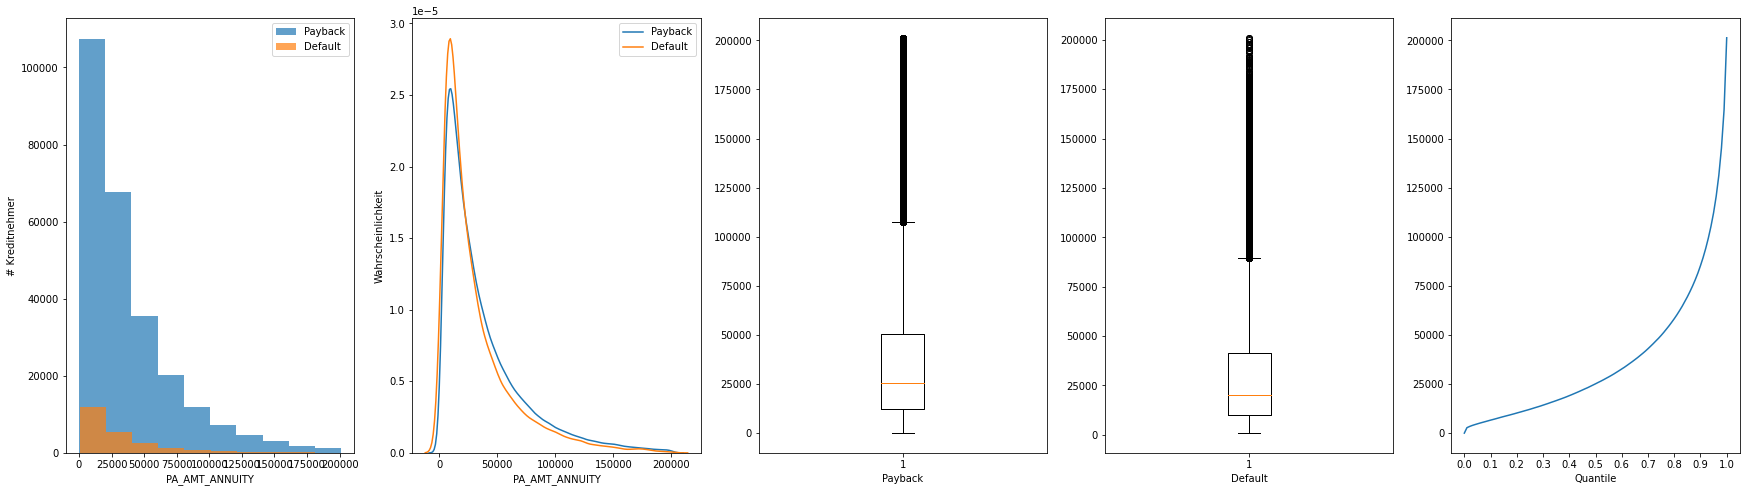

### PA_AMT_APPLICATION

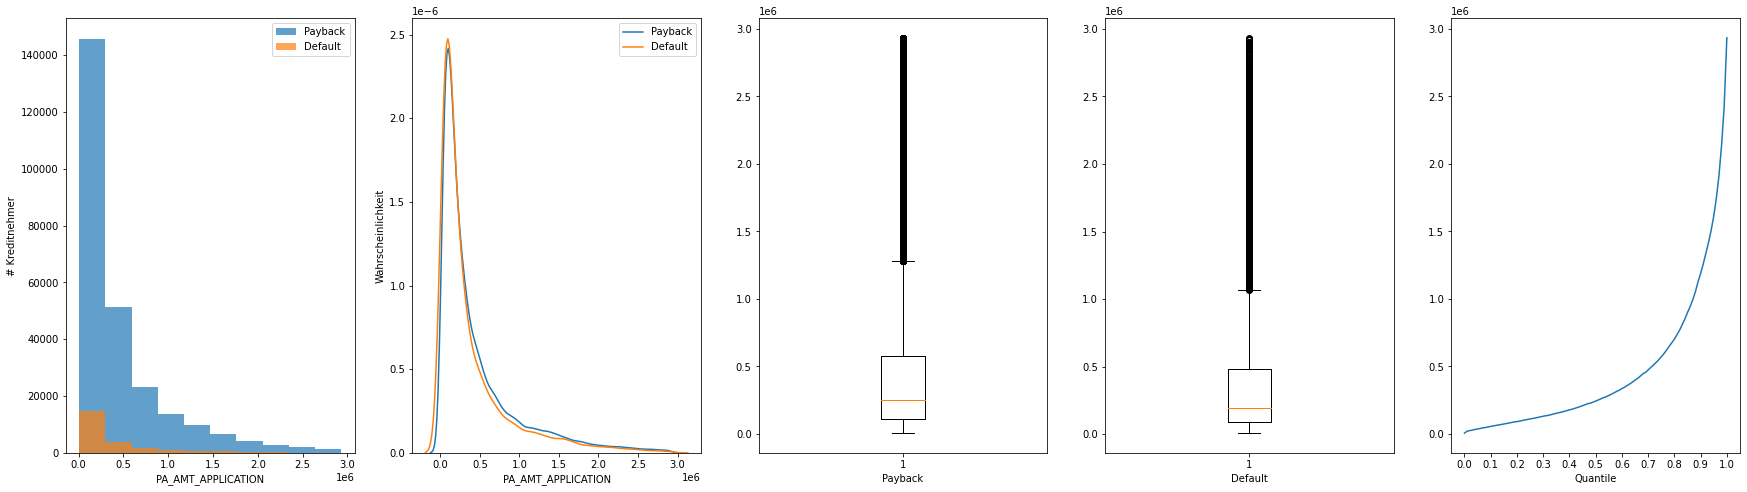

### PA_AMT_CREDIT

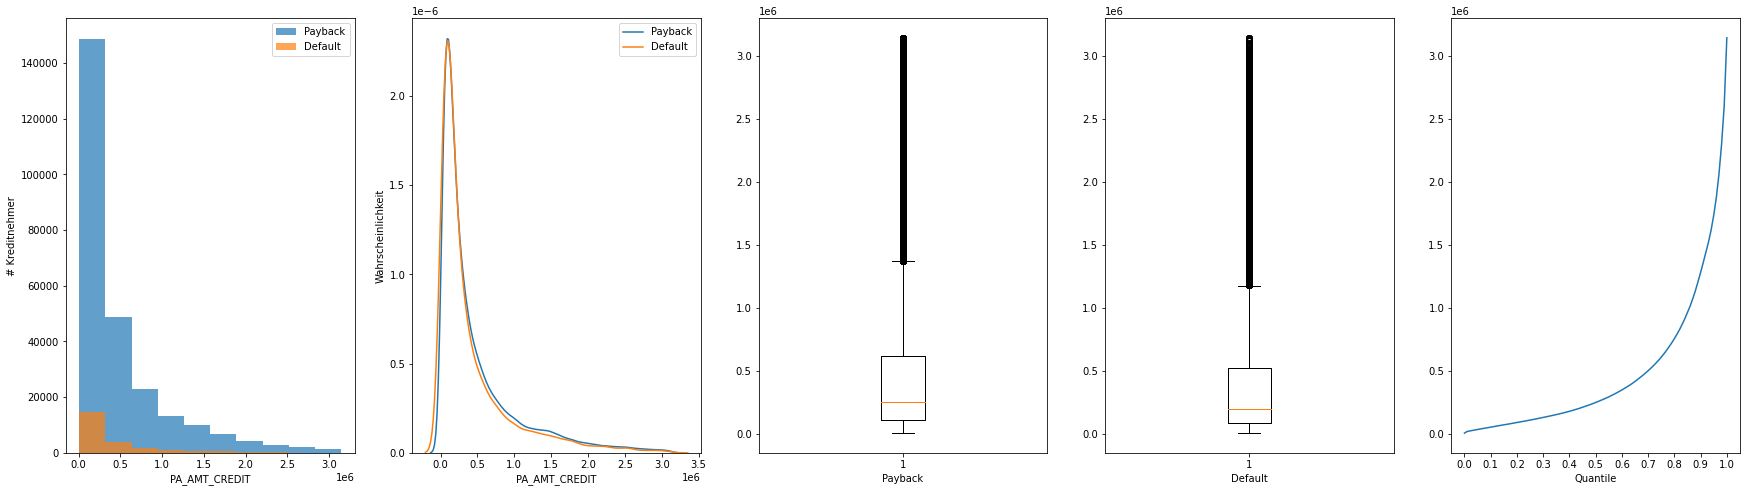

### PA_AMT_DOWN_PAYMENT

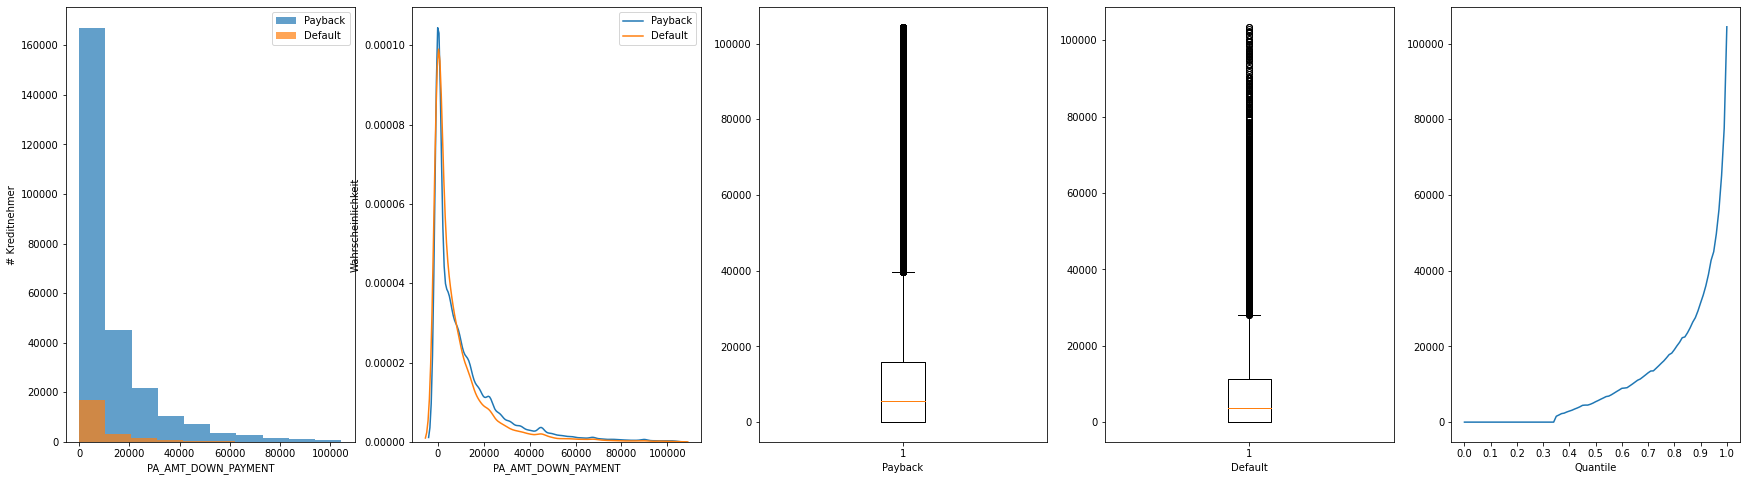

### PA_AMT_GOODS_PRICE

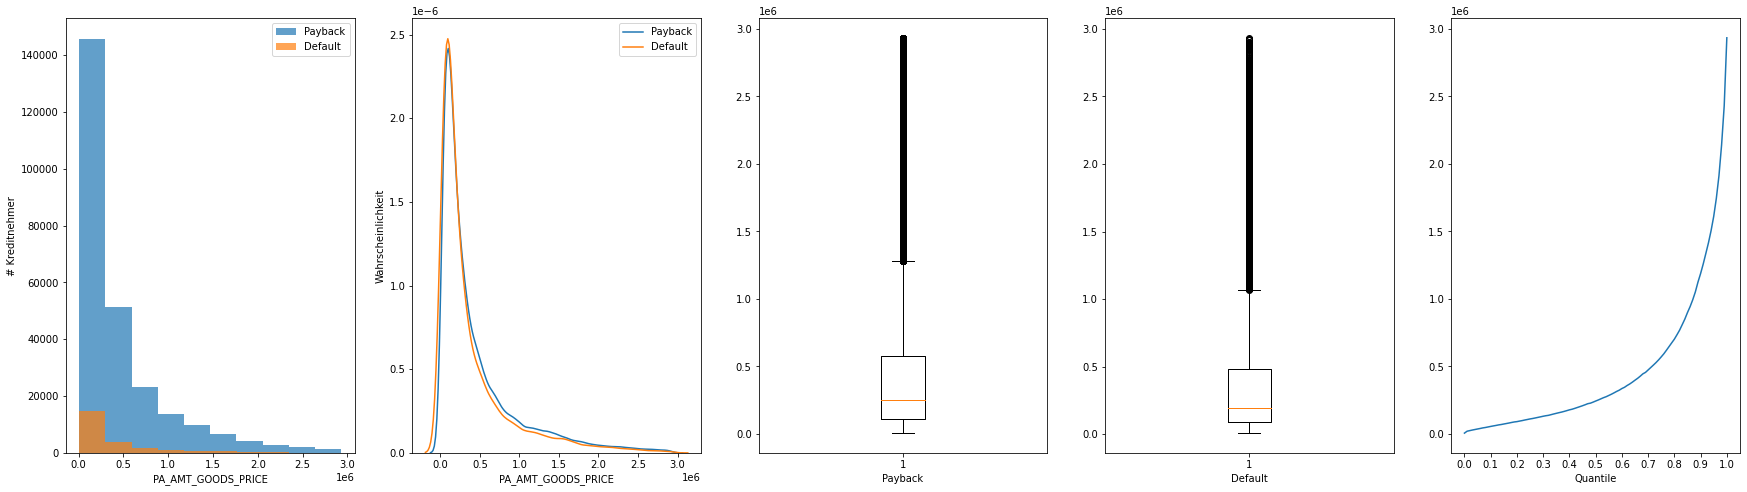

### PA_RATE_DOWN_PAYMENT

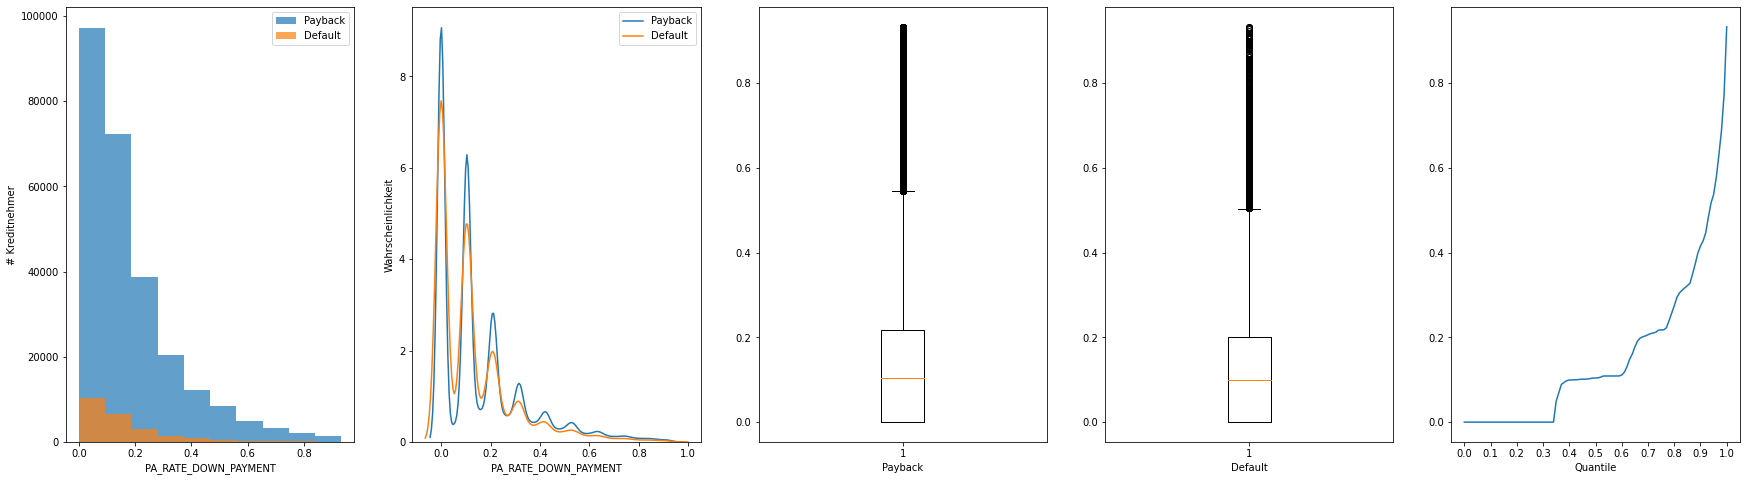

In [45]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
    fig.set_size_inches(30, 8)

    ax1.hist(pb, alpha=0.7)
    ax1.hist(df, alpha=0.7)
    ax1.legend(labels=["Payback","Default"])
    ax1.set_xlabel(head)
    ax1.set_ylabel("# Kreditnehmer")

    sns.kdeplot(pb, alpha=0.7, ax=ax2)
    sns.kdeplot(df, alpha=0.7, ax=ax2)
    ax2.legend(labels=["Payback","Default"])
    ax2.set_xlabel(head)
    ax2.set_ylabel("Wahrscheinlichkeit")

    a = payback[head].copy()
    a = a.dropna()
    ax3.boxplot(a)
    ax3.set_xlabel("Payback")
    

    b = default[head].copy()
    b = b.dropna()
    ax4.boxplot(b)
    ax4.set_xlabel("Default")

    quantiles = [pa_pos[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
    ax5.plot(np.arange(0,1 + 0.01,0.01), quantiles)
    ax5.set_xticks(np.arange(0,1 + 0.1,0.1))
    ax5.set_xlabel("Quantile")

    plt.show()

In [46]:
pa_pos.to_csv(DATASET_DIR / "3. Ausreißerbereinigung" / "pa_pos.csv")